In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [2]:
housing = pd.read_csv('cal_housing_clean.csv')

In [47]:
housing.head()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


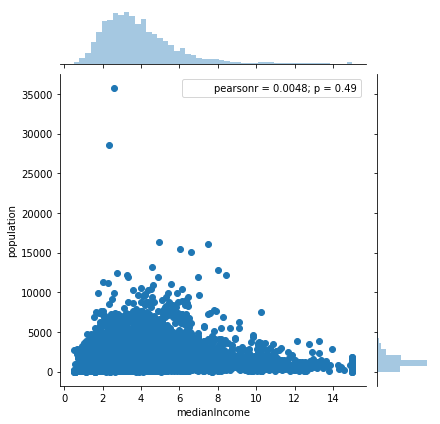

In [48]:
sns.jointplot(x='medianIncome',y='population',data=housing)

In [5]:
x_data = housing.drop('medianHouseValue',axis=1)
y_lable = housing['medianHouseValue']
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_lable, test_size=0.3, random_state=69)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
X_test= pd.DataFrame(scaler.transform(X_test),columns=X_test.columns,index=X_test.index)
X_train = pd.DataFrame(scaler.transform(X_train),columns=X_train.columns,index=X_train.index)

In [28]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [30]:
age = tf.feature_column.numeric_column('housingMedianAge')
rooms = tf.feature_column.numeric_column('totalRooms')
bedrooms = tf.feature_column.numeric_column('totalBedrooms')
pop = tf.feature_column.numeric_column('population')
households = tf.feature_column.numeric_column('households')
income = tf.feature_column.numeric_column('medianIncome')

In [31]:
fec_cols = [age,rooms,bedrooms,pop,households,income]

# Deep Neural Network

In [32]:
dnn_model = tf.estimator.DNNRegressor([20,20,20],feature_columns=fec_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpao8qtfvo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5a4816d3c8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [36]:
input_fun = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10, num_epochs=10000, shuffle=False)

In [37]:
dnn_model.train(input_fun,steps=10000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpao8qtfvo/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 10001 into /tmp/tmpao8qtfvo/model.ckpt.
INFO:tensorflow:loss = 190587140000.0, step = 17301 (0.306 sec)
INFO:tensorflow:global_step/sec: 379.506
INFO:tensorflow:loss = 114067230000.0, step = 17401 (0.268 sec)
INFO:tensorflow:global_step/sec: 408.231


INFO:tensorflow:loss = 126333550000.0, step = 17501 (0.242 sec)
INFO:tensorflow:global_step/sec: 419.433
INFO:tensorflow:loss = 224955630000.0, step = 17601 (0.237 sec)
INFO:tensorflow:loss = 180552660000.0, step = 19701 (0.325 sec)
INFO:tensorflow:global_step/sec: 302.21
INFO:tensorflow:loss = 168087360000.0, step = 19801 (0.333 sec)
INFO:tensorflow:global_step/sec: 326.14
INFO:tensorflow:loss = 83516700000.0, step = 19901 (0.304 sec)
INFO:tensorflow:Saving checkpoints for 20000 into /tmp/tmpao8qtfvo/model.ckpt.
INFO:tensorflow:Loss for final step: 205845300000.0.


In [41]:
predict_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)
predictions = dnn_model.predict(predict_input_func)

In [42]:
preds = []
for pred in predictions:
    preds.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpao8qtfvo/model.ckpt-20000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [44]:
from sklearn.metrics import mean_squared_error

In [46]:
mean_squared_error(y_test,preds)**0.5

116388.98365136418

## To reduce the squared error we can train a dense network with GPU so the error gets decreased